Now we're trying to learn more about how users behave, so we can use their behavior as a way to group 'similar minded users' or 'same movies' together. 

The most commonly used algorithm is **Collaborative filtering algorithms** because it is not dependent on any additional information.

There are several types of collaborative filtering algorithms :

**User-User Collaborative filtering:** Here we find look alike user to every user and offer movies which first user’s look alike has chosen in past. 

**Item-Item Collaborative filtering:** It is quite similar to previous algorithm, but instead of finding user look alike, we try finding movie look alike. Once we have movie look alike matrix, we can easily recommend alike movies to user who have watched any movie from the site.

# Data

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

movies = pd.read_csv('Dataset/movies.dat', sep = '::', engine='python',
                     names=['MovieID','Title','Genres'],index_col ='MovieID' )
users = pd.read_csv('Dataset/users.dat', sep = '::', engine='python',
                     names=['UserID','Gender','Age','Occupation','Zip-code'],index_col ='UserID' )
ratings = pd.read_csv('Dataset/ratings.dat', sep = '::', engine='python',
                     names=['UserID','MovieID','Rating','Timestamp'])#,index_col =['UserID','MovieID'] )
movies.shape , users.shape , ratings.shape
movies.head() , users.head() , ratings.head()

(                                      Title                        Genres
 MovieID                                                                  
 1                          Toy Story (1995)   Animation|Children's|Comedy
 2                            Jumanji (1995)  Adventure|Children's|Fantasy
 3                   Grumpier Old Men (1995)                Comedy|Romance
 4                  Waiting to Exhale (1995)                  Comedy|Drama
 5        Father of the Bride Part II (1995)                        Comedy,
        Gender  Age  Occupation Zip-code
 UserID                                 
 1           F    1          10    48067
 2           M   56          16    70072
 3           M   25          15    55117
 4           M   45           7    02460
 5           M   25          20    55455,
    UserID  MovieID  Rating  Timestamp
 0       1     1193       5  978300760
 1       1      661       3  978302109
 2       1      914       3  978301968
 3       1     3408       4  9

# Using dimension reduction techniques(PCA,NMF) for movie recommendation system

**Data wrangling**

 Now we're going to create two sparse matrix that contain each user ratings for **User-User Collaborative filtering** and **Item-Item Collaborative filtering**.


In [3]:
df_movies_ratings = pd.merge(movies,ratings,how='inner',on='MovieID')

df_user_rating_iic = pd.pivot_table(df_movies_ratings, values='Rating', index=['Title'], columns=['UserID'],  fill_value=0)
df_user_rating_iic.head()

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
'Night Mother (1986),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
'Til There Was You (1997),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"'burbs, The (1989)",0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
...And Justice for All (1979),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_user_rating_uuc = pd.pivot_table(df_movies_ratings, values='Rating', index=['UserID'], columns=['Title'],  fill_value=0)
df_user_rating_uuc.head()

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
iic_cols = np.matrix(df_user_rating_iic.values)
uuc_cols = np.matrix(df_user_rating_uuc.values)
iic_cols

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

**Plotting the variance of all features for iic_cols with PCA**

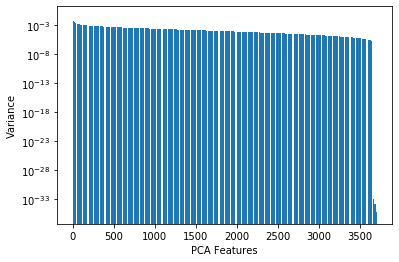

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

pca = PCA()
norm_cols = normalize(iic_cols)
pca.fit(norm_cols)
features = range(pca.n_components_)

plt.bar(features,pca.explained_variance_)
plt.xlabel('PCA Features')
plt.ylabel('Variance')
#use a logarithmic scaling for the y-axis for drawn the comparison bar chart for very small values
plt.yscale("log")
plt.show()

**It seems a lot of features are involved and we can't remove this important features. As we see, the variances are high even after 3500 features.**

In [7]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer , MaxAbsScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

# create training and testing vars
Xiic_train, Xiic_test = train_test_split(iic_cols, test_size=0.2)
Xuuc_train, Xuuc_test = train_test_split(uuc_cols, test_size=0.2)

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create a Normalizer: normalizer
normalizer = Normalizer()

pca = PCA(n_components=18)

nmf = NMF(n_components=18)

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler,pca,normalizer)

Just for a instance to see how the technique works, we create a pipline to find similar movies with movie 'Jurassic Park (1993)'

In [100]:
pipeline = make_pipeline(scaler,pca,normalizer)
norm_features = pipeline.fit_transform(df_user_rating_iic)

# Create a DataFrame: df
df = pd.DataFrame(norm_features,index=df_user_rating_iic.index)

# Select row of 'Bruce Springsteen': artist
movie = df.loc['Jurassic Park (1993)']

# Compute cosine similarities: similarities
similarities = df.dot(movie)

# Display those with highest cosine similarity
print(similarities.nlargest())

Title
Jurassic Park (1993)                                1.000000
Men in Black (1997)                                 0.968966
Terminator 2: Judgment Day (1991)                   0.967572
Matrix, The (1999)                                  0.959300
Star Wars: Episode I - The Phantom Menace (1999)    0.952072
dtype: float64


Now we perform both thechniques(PCA,NMF) for both user-user collaborative filtering and Item-Item Collaborative filtering and then try compare the accuracy of each technique with the following method.

In [8]:
def get_score(model, data, scorer=explained_variance_score):
    """ Estimate performance of the model on the data """
    prediction = model.inverse_transform(model.transform(data))
    return scorer(data, prediction)

#  User-User Collaborative filtering

**PCA**

In [9]:
scaler = MaxAbsScaler().fit(Xuuc_train)
Xuuc_train_sc = scaler.transform(Xuuc_train)
Xuuc_test_sc = scaler.transform(Xuuc_test)
pca.fit(Xuuc_train_sc),print(sum(pca.explained_variance_ratio_))

0.33367386262604876


(PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False), None)

**NMF**

In [10]:
nmf.fit(Xuuc_train_sc)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=18, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

**Comparing two techniques**

In [118]:
print('train set performance')
print(get_score(pca, Xuuc_train_sc))
print(get_score(nmf, Xuuc_train_sc))

print('test set performance')
print(get_score(pca, Xuuc_test_sc))
print(get_score(nmf, Xuuc_test_sc))

train set performance
0.1739691335797704
0.15988230956603688
test set performance
0.17365900480052268
0.1594946866977856


# How to choose the number of components

In [125]:
perfs_train = []
perfs_test = []
train_best_number_component = 1
test_best_number_component = 1
best_train_score = 0
best_test_score = 0
for k in range (2, 51):
    nmf = NMF(n_components=k).fit(Xuuc_train_sc)
    train_score = get_score(nmf, Xuuc_train_sc)
    test_score = get_score(nmf, Xuuc_test_sc) 
    if train_score > best_train_score :
        best_train_score = train_score
        train_best_number_component = k
    if test_score > best_test_score :
        best_test_score = test_score
        test_best_number_component = k
    perfs_train.append(train_score)
    perfs_test.append(test_score)
print(perfs_train)
print(perfs_test)
print('Best accuracy for train data is '  + str(best_train_score) + ' for ' + str(train_best_number_component) + ' components')
print('Best accuracy for test data is '  + str(best_test_score) + ' for ' + str(test_best_number_component) + ' components')

[0.08186290446509327, 0.09229895506935226, 0.1016371935990178, 0.10898958415747735, 0.11386617963264502, 0.12172578735192513, 0.12793941122010707, 0.1322281169089284, 0.13613194275232524, 0.14079001665531615, 0.14371486341278664, 0.14684181528450246, 0.1491012402208589, 0.15250581860336263, 0.15499162934089866, 0.15741892319736908, 0.15939578710595173, 0.1622659262814873, 0.1635238449414438, 0.16546269931386917, 0.1656431969743758, 0.1669446379100128, 0.1688012705642873, 0.17080992747409893, 0.1719841397514235, 0.17260992949396525, 0.17583459187601688, 0.17640818113321566, 0.17690623121333468, 0.17784372278958896, 0.17943917150154445, 0.18007992981250817, 0.18160095153814793, 0.1831877170348339, 0.18268393209460207, 0.18374332179883776, 0.18465910565430718, 0.18708641282020783, 0.18815799193637853, 0.18899024301096784, 0.18983209450267652, 0.1911244888849236, 0.19124500811934025, 0.19191741414411354, 0.19374625325908787, 0.19513980488916186, 0.19489251695889515, 0.19453088971366703, 0.

In [127]:
perfs_train = []
perfs_test = []
train_best_number_component = 1
test_best_number_component = 1
best_train_score = 0
best_test_score = 0
for k in range (51, 101):
    nmf = NMF(n_components=k).fit(Xuuc_train_sc)
    train_score = get_score(nmf, Xuuc_train_sc)
    test_score = get_score(nmf, Xuuc_test_sc) 
    if train_score > best_train_score :
        best_train_score = train_score
        train_best_number_component = k
    if test_score > best_test_score :
        best_test_score = test_score
        test_best_number_component = k
    perfs_train.append(train_score)
    perfs_test.append(test_score)
print(perfs_train)
print(perfs_test)
print('Best accuracy for train data is '  + str(best_train_score) + ' for ' + str(train_best_number_component) + ' components')
print('Best accuracy for test data is '  + str(best_test_score) + ' for ' + str(test_best_number_component) + ' components')

[0.19648669678767502, 0.1986998542463201, 0.19963866223962112, 0.1988488584080258, 0.20019290724023386, 0.19953487320072297, 0.20061212564543424, 0.2010800346533963, 0.2018162776127691, 0.21291570023798512, 0.21349519560141006, 0.20451635831228682, 0.20424502766902078, 0.21519498319587593, 0.20603859013474868, 0.21110491127963812, 0.2086471018161734, 0.21558238173594707, 0.2151150352416, 0.2107460819716614, 0.21505695437573208, 0.21912855355284014, 0.21017566994099582, 0.21931441187907186, 0.2213747790335254, 0.21778004918016822, 0.21627693120322838, 0.22044627743633627, 0.22251998446994808, 0.22273913465476955, 0.22160017087403683, 0.22018952563826064, 0.22090939050312378, 0.21783849569227445, 0.226699400752907, 0.22092607069159986, 0.22640522609448263, 0.22565118525239158, 0.2275943101173547, 0.22682433157754986, 0.22310768266714393, 0.22965639204702049, 0.22998951060942885, 0.23009000220930342, 0.23030215862752376, 0.23070328505692309, 0.2283613697160685, 0.2318262776907529, 0.23239

**As we see, acuuracy is getting higher as we increased number of components and we can't continue because of 

# Item-Item Collaborative filtering

**PCA**

In [133]:
scaler = MaxAbsScaler().fit(Xiic_train)
Xiic_train_sc = scaler.transform(Xiic_train)
Xiic_test_sc = scaler.transform(Xiic_test)
pca.fit(Xiic_train_sc),print(sum(pca.explained_variance_ratio_))

0.37312343623353866


(PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False), None)

**NMF**

In [129]:
nmf.fit(Xiic_train_sc)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=100, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

**Comparing two techniques**

In [134]:
print('train set performance')
print(get_score(pca, Xiic_train_sc))
print(get_score(nmf, Xiic_train_sc))

print('test set performance')
print(get_score(pca, Xiic_test_sc))
print(get_score(nmf, Xiic_test_sc))

train set performance
0.2944413953026352
0.4543289929438562
test set performance
0.2328569579931629
0.27497884487460506


As wee see these techniques have low accuray on this data.

# Using Singular Value Decomposition(SVD) for Collaborative Filtering

One way to handle the scalability and sparsity issue created by collaborative filtering is to leverage a latent factor model to capture the similarity between users and items.singular value decomposition is particularly useful for making recommendations.

we nee normalize data by deducting each users mean

In [373]:
user_ratings_mean = np.mean(uuc_cols, axis = 1)
uuc_cols_demeaned = uuc_cols - user_ratings_mean.reshape(-1, 1)

In [374]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import svds
A = csc_matrix(uuc_cols, dtype=float)
u, s, vt = svds(A, k=2) # k is the number of factors

In [375]:
# convert to the diagonal matrix form
sigma = np.diag(s)

In [376]:
# calculating svd and also added back the mean
all_user_predicted_ratings = np.dot(np.dot(u, sigma), vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = df_user_rating_uuc.columns)
preds_df.head()

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
0,0.072704,0.093469,0.073733,0.142480,0.141603,0.060066,0.207099,0.247683,0.140864,0.322552,...,0.098412,0.194444,0.066231,0.110806,0.060065,0.075339,0.182808,0.061501,0.065760,0.169876
1,0.153209,0.171967,0.157121,0.325278,0.253048,0.129371,0.504528,0.495709,0.321200,0.492807,...,0.186736,0.419380,0.135544,0.210205,0.130184,0.145655,0.374788,0.131497,0.142612,0.365183
2,0.066225,0.069309,0.068935,0.170068,0.108692,0.053698,0.283295,0.250331,0.167583,0.200978,...,0.078877,0.218217,0.055132,0.091239,0.054396,0.058099,0.187271,0.054623,0.061487,0.187131
3,0.030543,0.034015,0.031836,0.083177,0.056189,0.023763,0.139397,0.129095,0.081923,0.115110,...,0.038712,0.109585,0.025020,0.045396,0.024068,0.027251,0.094834,0.024314,0.027757,0.093452
4,0.192394,0.234243,0.194106,0.319744,0.326669,0.168437,0.435262,0.522582,0.316807,0.682042,...,0.242949,0.418727,0.180788,0.266433,0.168336,0.198914,0.399423,0.171228,0.178927,0.373110


In [307]:
# before writing function, try prediction for one user
# try to find recommendation for userid = 1
user_full = preds_df.iloc[0].sort_values(ascending=False)
user_data = df_user_rating_uuc.iloc[1].sort_values(ascending=False)
np.count_nonzero(user_data)

user_data[user_data != 0].index
df_user_rating_uuc.columns
user_non_ratings_movies = [x for x in df_user_rating_uuc.columns if x not in user_data[user_data != 0].index]

#preds_df.iloc[1].sort_values(ascending=False)
#preds_df[[preds_df.columns.isin(a)]]
d = preds_df.iloc[0].sort_values(ascending=False)
#d[x for x in d.index  if x  in user_non_ratings_movies]
s = d[d.index.isin(user_non_ratings_movies)]
s.head(10).index.tolist()


['Toy Story (1995)',
 'Toy Story 2 (1999)',
 "Schindler's List (1993)",
 "Bug's Life, A (1998)",
 'Beauty and the Beast (1991)',
 'Aladdin (1992)',
 'Babe (1995)',
 'Back to the Future (1985)',
 'Lion King, The (1994)',
 'Wizard of Oz, The (1939)']

In [365]:
def recommend_movies(predictions_df, userID, user_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1# UserID starts at 1, not 0
    sorted_user_predictions = predictions_df.iloc[user_row_number].sort_values(ascending=False)
    
    # Get the user's data and merge in the movie information.
    user_data = user_ratings_df.iloc[userID]


    print ('User {0} has already rated {1} movies.'.format(userID, np.count_nonzero(user_data)))
    print( 'Recommending the highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    user_non_ratings_movies = [x for x in user_ratings_df.columns if x not in user_data[user_data != 0].index]
    
    
    recommendations = sorted_user_predictions[sorted_user_predictions.index.isin(user_non_ratings_movies)].head(num_recommendations).index.tolist()
    

    return recommendations
 
recommend_movies(preds_df, 1, df_user_rating_uuc, 10)

User 1 has already rated 129 movies.
Recommending the highest 10 predicted ratings movies not already rated.


['Star Wars: Episode IV - A New Hope (1977)',
 'Fargo (1996)',
 'Godfather, The (1972)',
 "Schindler's List (1993)",
 'Pulp Fiction (1994)',
 'L.A. Confidential (1997)',
 'Back to the Future (1985)',
 'Princess Bride, The (1987)',
 'Sixth Sense, The (1999)',
 'E.T. the Extra-Terrestrial (1982)']

# Tuning model for determining optimum number of K with Silhouette Method

**To determine the optimum number of topics is to consider each topic as a cluster and find out the effectiveness of a cluster using the Silhouette coefficient.**

In [357]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

**Using K-Means Clustering**

In [361]:
best_number_cluster = 2
best_score = 0
for n_clusters in range (2, 101):
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(uuc_cols)
    silhouette_avg = silhouette_score(uuc_cols, cluster_labels)
    if silhouette_avg > best_score :
        best_score = silhouette_avg
        best_number_cluster = n_clusters
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
print('==================================================================')
print('Best score is ' + str(best_score) + ' for ' + str(best_number_cluster) + ' clusters')

For n_clusters = 2 The average silhouette_score is : 0.30800188841487086
For n_clusters = 3 The average silhouette_score is : 0.15946213680849425
For n_clusters = 4 The average silhouette_score is : 0.16778430197501149
For n_clusters = 5 The average silhouette_score is : 0.0951150547775839
For n_clusters = 6 The average silhouette_score is : 0.09575201346410289
For n_clusters = 7 The average silhouette_score is : 0.08854351119866095
For n_clusters = 8 The average silhouette_score is : 0.05347370434202014
For n_clusters = 9 The average silhouette_score is : 0.05184626294860819
For n_clusters = 10 The average silhouette_score is : 0.037985091677616406
For n_clusters = 11 The average silhouette_score is : 0.031406500886898836
For n_clusters = 12 The average silhouette_score is : -0.01685566887005011
For n_clusters = 13 The average silhouette_score is : 0.05300643186677158
For n_clusters = 14 The average silhouette_score is : 0.040486774734042205
For n_clusters = 15 The average silhouette_

**The best score is related for 2 cluster but also we can consider 4-cluster since the score from 3 to 4 cluster has increasement.**

# Item-Item Collaborative Filtering Using k-Nearest Neighbors (kNN)

In [478]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(iic_cols)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [574]:
def recommend_movies(movie_name):
    recommendation = []
    query_index = df_user_rating_iic.reset_index()[df_user_rating_iic.reset_index().Title == movie_name].index
    distances, indices = model_knn.kneighbors(df_user_rating_iic.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 6)

    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Recommendations for {0}:\n'.format(df_user_rating_iic.index[query_index]))
        else:
            print('{0}: {1}, with distance of {2}:'.format(i, df_user_rating_iic.index[indices.flatten()[i]], distances.flatten()[i]))
            recommendation.append( df_user_rating_iic.index[indices.flatten()[i]])
    return recommendation

In [575]:
recommend_movies('Rocky V (1990)')

Recommendations for Index(['Rocky V (1990)'], dtype='object', name='Title'):

1: Rocky IV (1985), with distance of 0.42650837523821294:
2: Rocky III (1982), with distance of 0.4679171041160448:
3: Rocky II (1979), with distance of 0.5045765058812857:
4: Rambo III (1988), with distance of 0.5667442781172951:
5: Karate Kid III, The (1989), with distance of 0.5928881696100177:


['Rocky IV (1985)',
 'Rocky III (1982)',
 'Rocky II (1979)',
 'Rambo III (1988)',
 'Karate Kid III, The (1989)']

In [571]:
#random name
radom_index = np.random.choice(df_user_rating_iic.shape[0])
random_name = df_user_rating_iic.iloc[radom_index].name
recommend_movies(random_name)

Recommendations for Index(['Schindler's List (1993)'], dtype='object', name='Title'):

1: Shawshank Redemption, The (1994), with distance of 0.3445898259350073:
2: Silence of the Lambs, The (1991), with distance of 0.37369497885629266:
3: Saving Private Ryan (1998), with distance of 0.3758010675271676:
4: Fargo (1996), with distance of 0.38689747123020946:
5: Pulp Fiction (1994), with distance of 0.4095661222616056:


['Shawshank Redemption, The (1994)',
 'Silence of the Lambs, The (1991)',
 'Saving Private Ryan (1998)',
 'Fargo (1996)',
 'Pulp Fiction (1994)']